# Limpieza 

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos

data = pd.read_csv('E:/Mi unidad/VSC/proyecto2/data/customer_churn.csv')


In [38]:
# Aunque no hay datos perdidos,corroboramos.
data.isna().sum().sum()

np.int64(0)

In [5]:
# Quitamos duplicados
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            2850 non-null   int64  
 1   Complains                2850 non-null   int64  
 2   Subscription  Length     2850 non-null   int64  
 3   Charge  Amount           2850 non-null   int64  
 4   Seconds of Use           2850 non-null   int64  
 5   Frequency of use         2850 non-null   int64  
 6   Frequency of SMS         2850 non-null   int64  
 7   Distinct Called Numbers  2850 non-null   int64  
 8   Age Group                2850 non-null   int64  
 9   Tariff Plan              2850 non-null   int64  
 10  Status                   2850 non-null   int64  
 11  Age                      2850 non-null   int64  
 12  Customer Value           2850 non-null   float64
 13  Churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)
memo

In [7]:
def winsorizar_iqr(df, columna):
    """
    Reemplaza outliers por los límites de IQR (winsorización).
    Modifica la columna directamente en el DataFrame.
    """
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    
    original_outliers = ((df[columna] < lim_inf) | (df[columna] > lim_sup)).sum()

    # Aplicamos winsorización
    df[columna] = df[columna].apply(
        lambda x: lim_inf if x < lim_inf else lim_sup if x > lim_sup else x
    )

    print(f"Reemplazados {original_outliers} outliers en '{columna}'")
    return df


In [8]:
data.rename(columns={
    'Call  Failure': 'Falla de Llamada',
    'Complains': 'Quejas',
    'Subscription  Length': 'Tiempo de Suscripción',
    'Charge  Amount': 'Monto Cobrado',
    'Seconds of Use': 'Segundos de Uso',
    'Frequency of use': 'Frecuencia de Uso',
    'Frequency of SMS': 'Frecuencia de SMS',
    'Distinct Called Numbers': 'Números Distintos Llamados',
    'Age Group': 'Grupo de Edad',
    'Tariff Plan': 'Plan Tarifario',
    'Status': 'Estado',
    'Age': 'Edad',
    'Customer Value': 'Valor del Cliente',
    'Churn': 'Fuga'
}, inplace=True)
data.columns

Index(['Falla de Llamada', 'Quejas', 'Tiempo de Suscripción', 'Monto Cobrado',
       'Segundos de Uso', 'Frecuencia de Uso', 'Frecuencia de SMS',
       'Números Distintos Llamados', 'Grupo de Edad', 'Plan Tarifario',
       'Estado', 'Edad', 'Valor del Cliente', 'Fuga'],
      dtype='object')

In [9]:
variables = ['Falla de Llamada','Tiempo de Suscripción',
       'Segundos de Uso', 'Frecuencia de Uso', 'Frecuencia de SMS',
       'Números Distintos Llamados','Valor del Cliente']

for i in variables:
    winsorizar_iqr(data, i)

Reemplazados 44 outliers en 'Falla de Llamada'
Reemplazados 208 outliers en 'Tiempo de Suscripción'
Reemplazados 189 outliers en 'Segundos de Uso'
Reemplazados 118 outliers en 'Frecuencia de Uso'
Reemplazados 333 outliers en 'Frecuencia de SMS'
Reemplazados 82 outliers en 'Números Distintos Llamados'
Reemplazados 104 outliers en 'Valor del Cliente'


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Estilo global unificado
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams.update({
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "figure.titlesize": 16
})

def graficar_variables(df):
    """
    Genera histogramas y boxplots para variables numéricas,
    y gráficos de barras y pie charts para variables categóricas
    (definidas como aquellas con <=11 valores únicos).

    Parámetro:
    df : pd.DataFrame
        El DataFrame de entrada.
    """
    for col in df.columns:
        valores_unicos = df[col].nunique(dropna=True)
        col_data = df[col].dropna()

        plt.figure(figsize=(12, 5))
        plt.suptitle(f"Visualización para: '{col}'", fontsize=16, fontweight='bold')

        if pd.api.types.is_numeric_dtype(df[col]) and valores_unicos > 11:
            # Histograma
            plt.subplot(1, 2, 1)
            sns.histplot(col_data, kde=True, color='steelblue', edgecolor='white')
            plt.title("Histograma")
            plt.xlabel(col)
            plt.ylabel("Frecuencia")

            # Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(x=col_data, color='mediumseagreen')
            plt.title("Boxplot")
            plt.xlabel(col)

        else:
            conteo = df[col].value_counts(dropna=False)

            # Gráfico de Barras
            plt.subplot(1, 2, 1)
            sns.barplot(x=conteo.index.astype(str), y=conteo.values, palette='Set2', edgecolor='black')
            plt.xticks(rotation=45)
            plt.title("Gráfico de Barras")
            plt.xlabel(col)
            plt.ylabel("Frecuencia")

            # Pie chart
            plt.subplot(1, 2, 2)
            colores = sns.color_palette('Set2', n_colors=len(conteo))
            plt.pie(conteo.values, labels=conteo.index.astype(str), autopct='%1.1f%%',
                    startangle=90, colors=colores, textprops={'fontsize': 10})
            plt.title("Gráfico de Torta")

        plt.tight_layout(rect=[0, 0, 1, 0.92])
        plt.show()


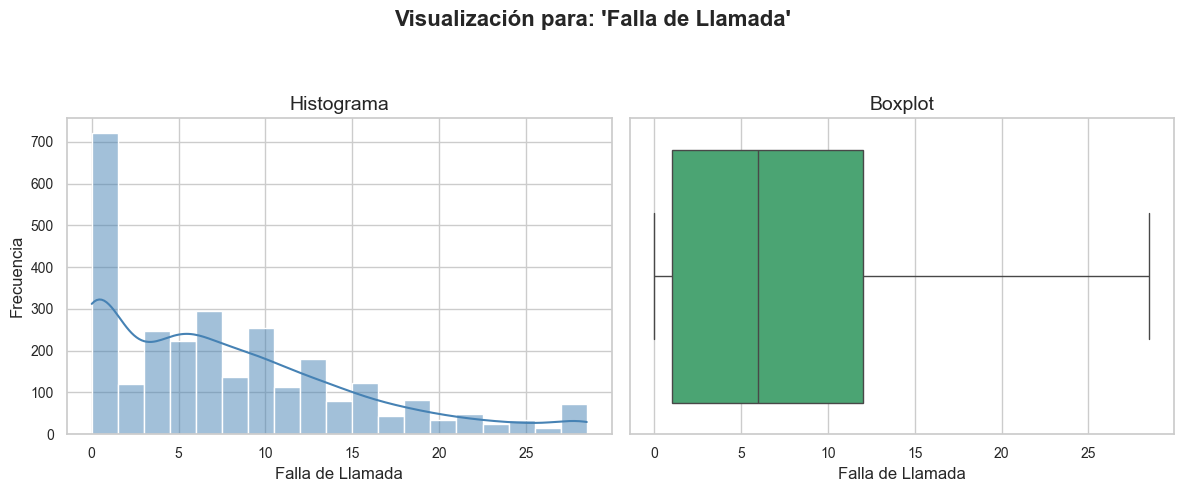

C:\Users\Jeffersson Pretell\AppData\Local\Temp\ipykernel_12188\1385532283.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index.astype(str), y=conteo.values, palette='Set2', edgecolor='black')


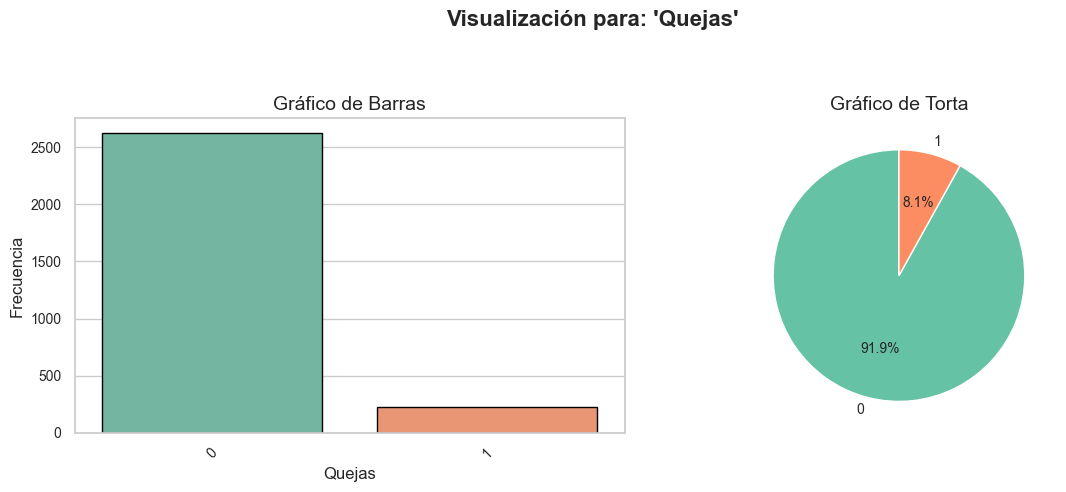

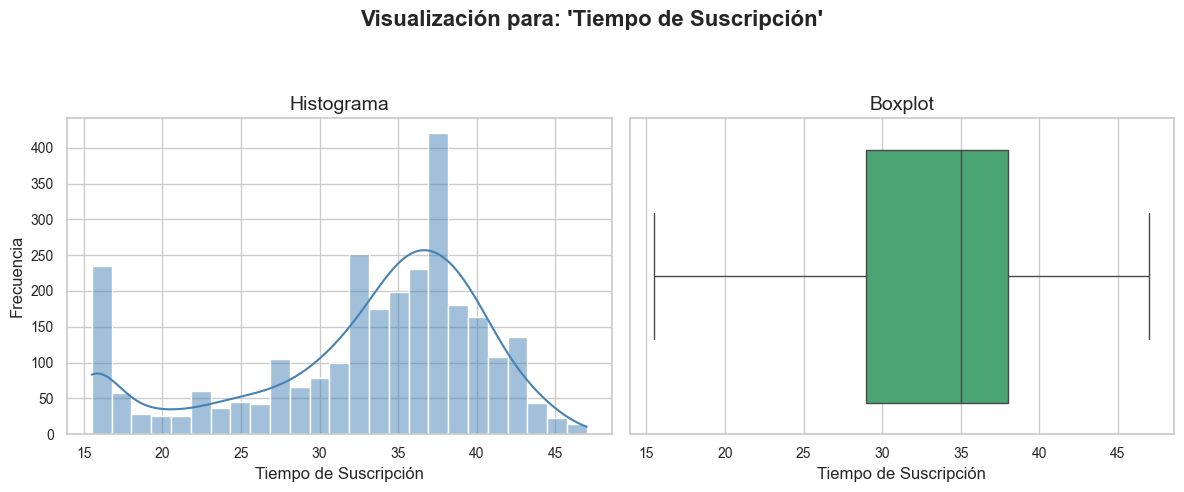

C:\Users\Jeffersson Pretell\AppData\Local\Temp\ipykernel_12188\1385532283.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index.astype(str), y=conteo.values, palette='Set2', edgecolor='black')


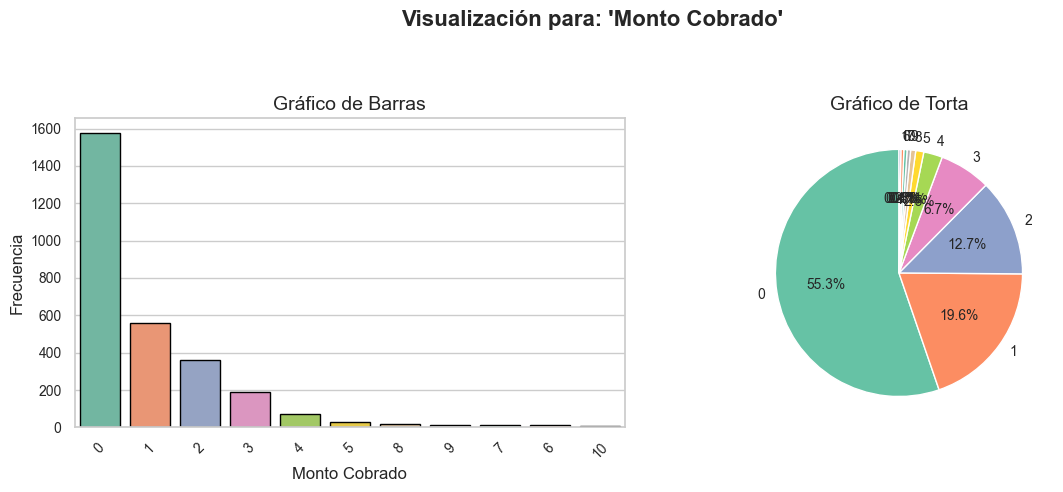

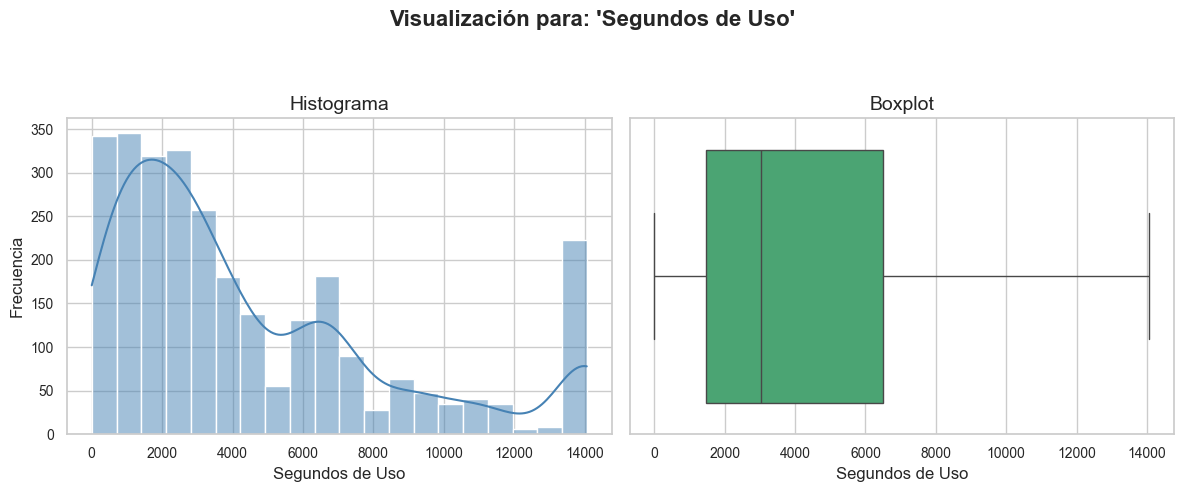

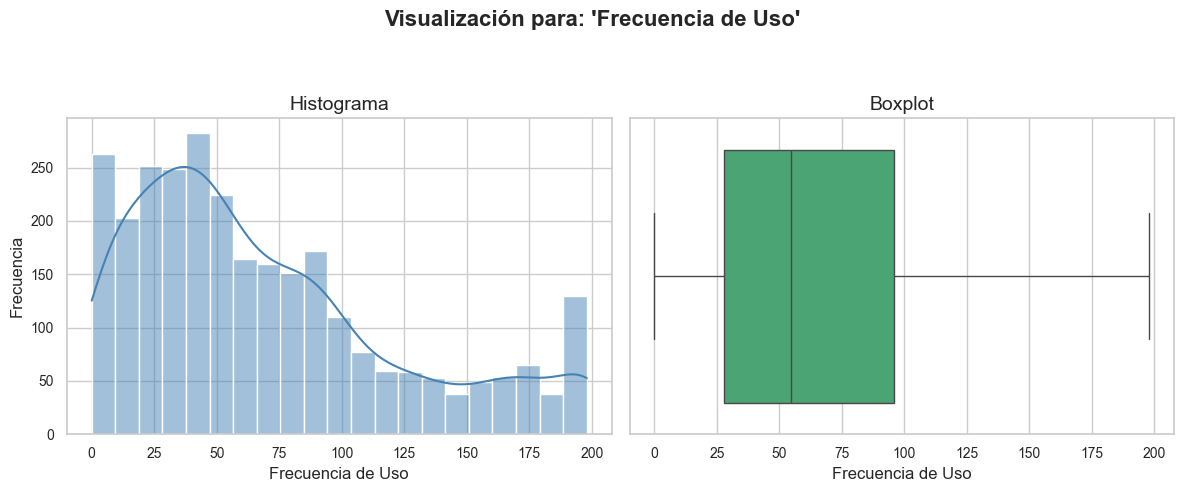

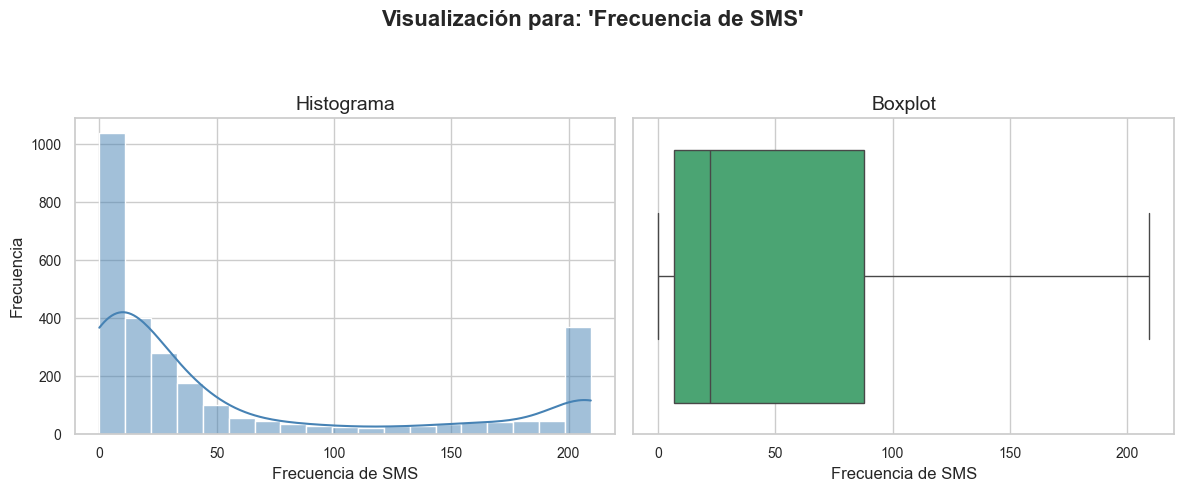

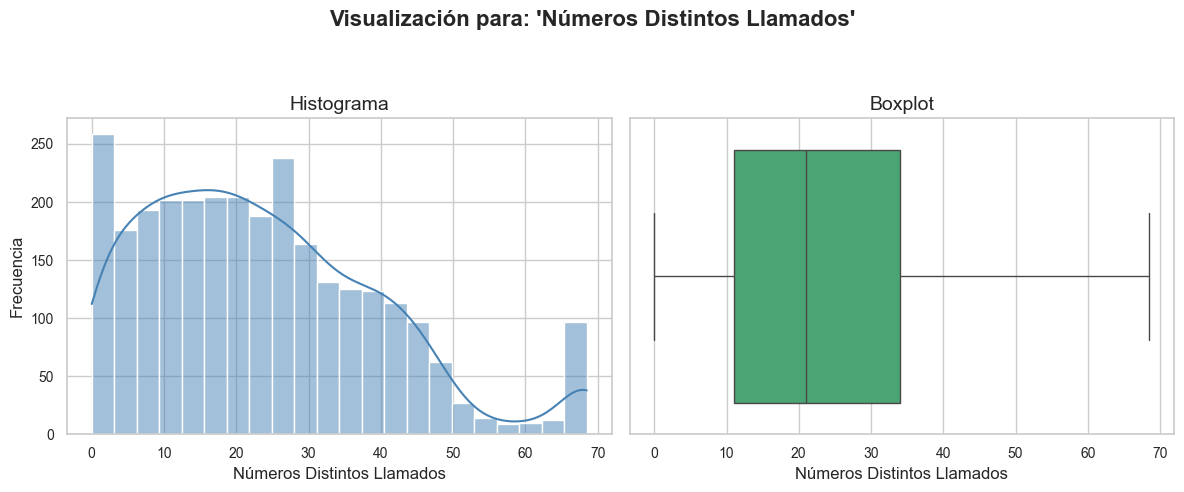

C:\Users\Jeffersson Pretell\AppData\Local\Temp\ipykernel_12188\1385532283.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index.astype(str), y=conteo.values, palette='Set2', edgecolor='black')


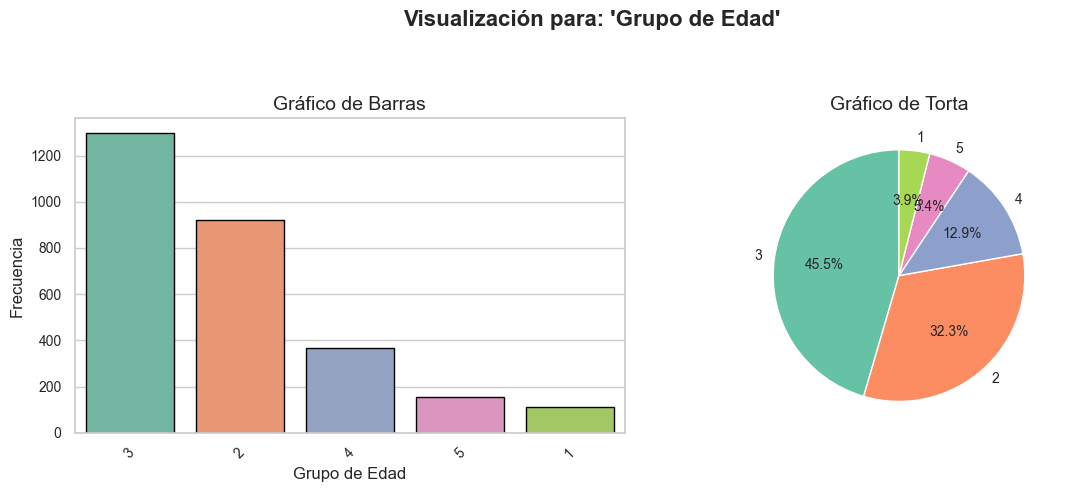

C:\Users\Jeffersson Pretell\AppData\Local\Temp\ipykernel_12188\1385532283.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index.astype(str), y=conteo.values, palette='Set2', edgecolor='black')


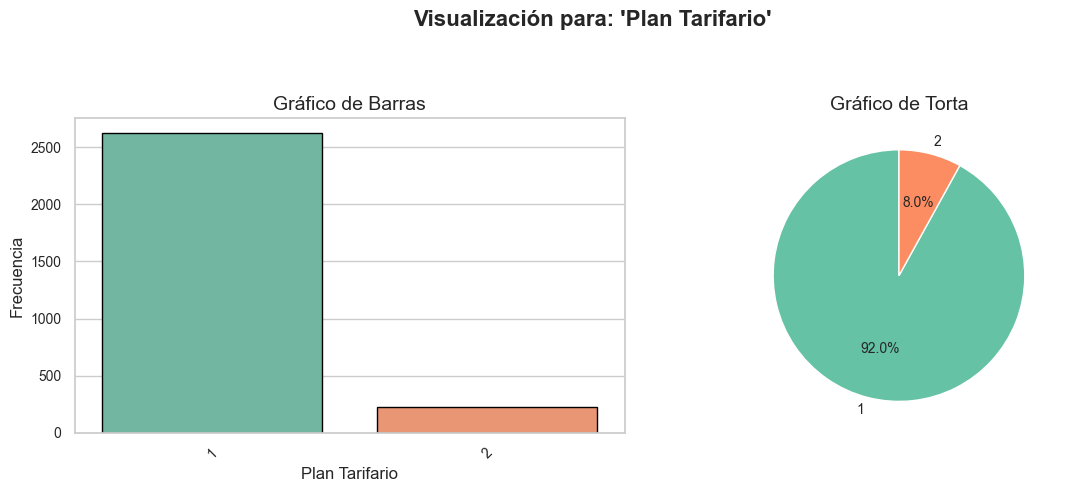

C:\Users\Jeffersson Pretell\AppData\Local\Temp\ipykernel_12188\1385532283.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index.astype(str), y=conteo.values, palette='Set2', edgecolor='black')


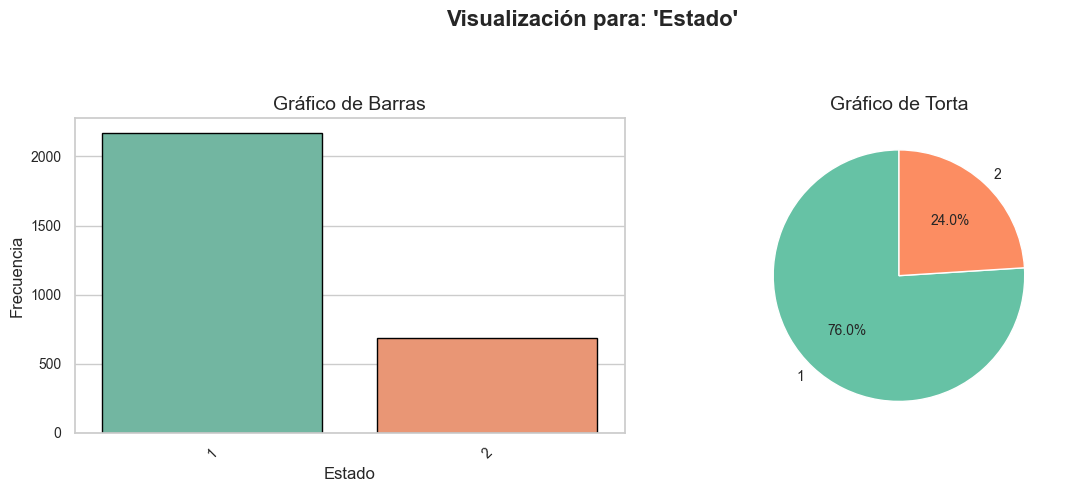

C:\Users\Jeffersson Pretell\AppData\Local\Temp\ipykernel_12188\1385532283.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index.astype(str), y=conteo.values, palette='Set2', edgecolor='black')


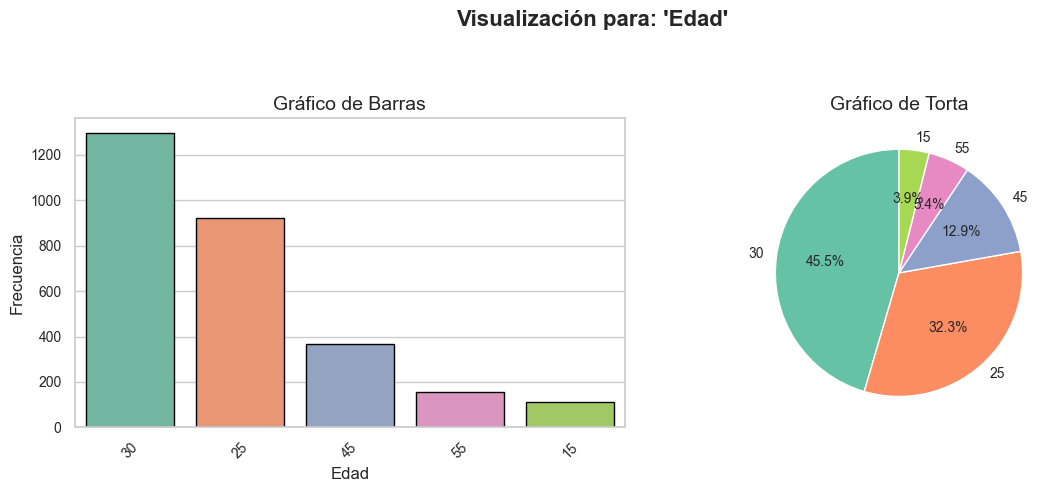

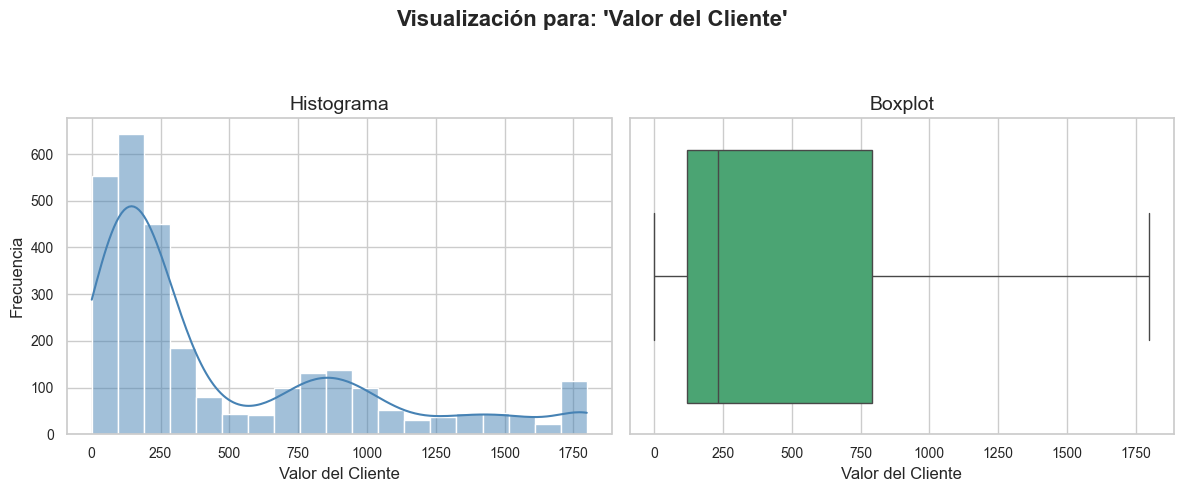

C:\Users\Jeffersson Pretell\AppData\Local\Temp\ipykernel_12188\1385532283.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index.astype(str), y=conteo.values, palette='Set2', edgecolor='black')


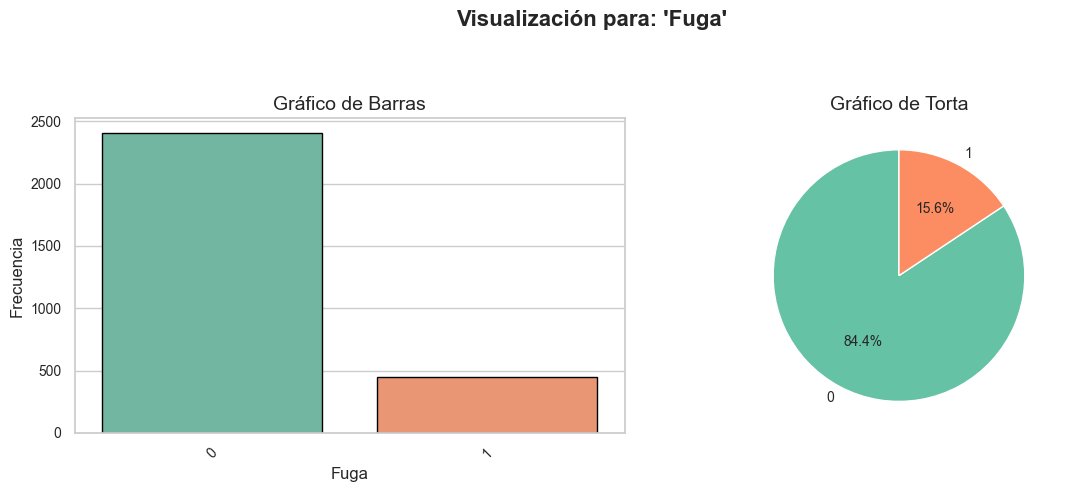

In [11]:
graficar_variables(data)


# Eliminamos y creammos variables

In [12]:
data.columns

Index(['Falla de Llamada', 'Quejas', 'Tiempo de Suscripción', 'Monto Cobrado',
       'Segundos de Uso', 'Frecuencia de Uso', 'Frecuencia de SMS',
       'Números Distintos Llamados', 'Grupo de Edad', 'Plan Tarifario',
       'Estado', 'Edad', 'Valor del Cliente', 'Fuga'],
      dtype='object')

In [13]:
data.head(10)

,Falla de Llamada,Quejas,Tiempo de Suscripción,Monto Cobrado,Segundos de Uso,Frecuencia de Uso,Frecuencia de SMS,Números Distintos Llamados,Grupo de Edad,Plan Tarifario,Estado,Edad,Valor del Cliente,Fuga
0,8.0,0,38.0,0,4370.0,71.0,5.0,17.0,3,1,1,30,197.640,0
1,0.0,0,39.0,0,318.0,5.0,7.0,4.0,2,1,2,25,46.035,0
2,10.0,0,37.0,0,2453.0,60.0,209.5,24.0,3,1,1,30,1536.520,0
3,10.0,0,38.0,0,4198.0,66.0,1.0,35.0,1,1,1,15,240.020,0
4,3.0,0,38.0,0,2393.0,58.0,2.0,33.0,1,1,1,15,145.805,0
5,11.0,0,38.0,1,3775.0,82.0,32.0,28.0,3,1,1,30,282.280,0
6,4.0,0,38.0,0,2360.0,39.0,209.5,18.0,3,1,1,30,1235.960,0
7,13.0,0,37.0,2,9115.0,121.0,144.0,43.0,3,1,1,30,945.440,0
8,7.0,0,38.0,0,13773.0,169.0,0.0,44.0,3,1,1,30,557.680,0
9,7.0,0,38.0,1,4515.0,83.0,2.0,25.0,3,1,1,30,191.920,0


In [14]:
data['Grupo de Edad'].unique()

array([3, 2, 1, 4, 5])

In [15]:
data_prueba = data.copy()

In [16]:
data_prueba.drop(columns= 'Edad',inplace=True)

In [17]:
data_prueba.columns

Index(['Falla de Llamada', 'Quejas', 'Tiempo de Suscripción', 'Monto Cobrado',
       'Segundos de Uso', 'Frecuencia de Uso', 'Frecuencia de SMS',
       'Números Distintos Llamados', 'Grupo de Edad', 'Plan Tarifario',
       'Estado', 'Valor del Cliente', 'Fuga'],
      dtype='object')

In [18]:
# Fallas por mes que tiene el cliente
data_prueba['fallas_por_mes'] = data_prueba['Falla de Llamada'] / data_prueba['Tiempo de Suscripción']

# Cantidad de llamadas al día

data_prueba['llamadas_al_día'] = data_prueba['Frecuencia de Uso'] / data_prueba['Tiempo de Suscripción']*30

# Cantidad de SMS al día
data_prueba['sms_al_día'] = data_prueba['Frecuencia de SMS'] / data_prueba['Tiempo de Suscripción']*30

# Quejas al mes

data_prueba['quejas_por_mes'] = data_prueba['Quejas'] / data_prueba['Tiempo de Suscripción']


<Axes: >

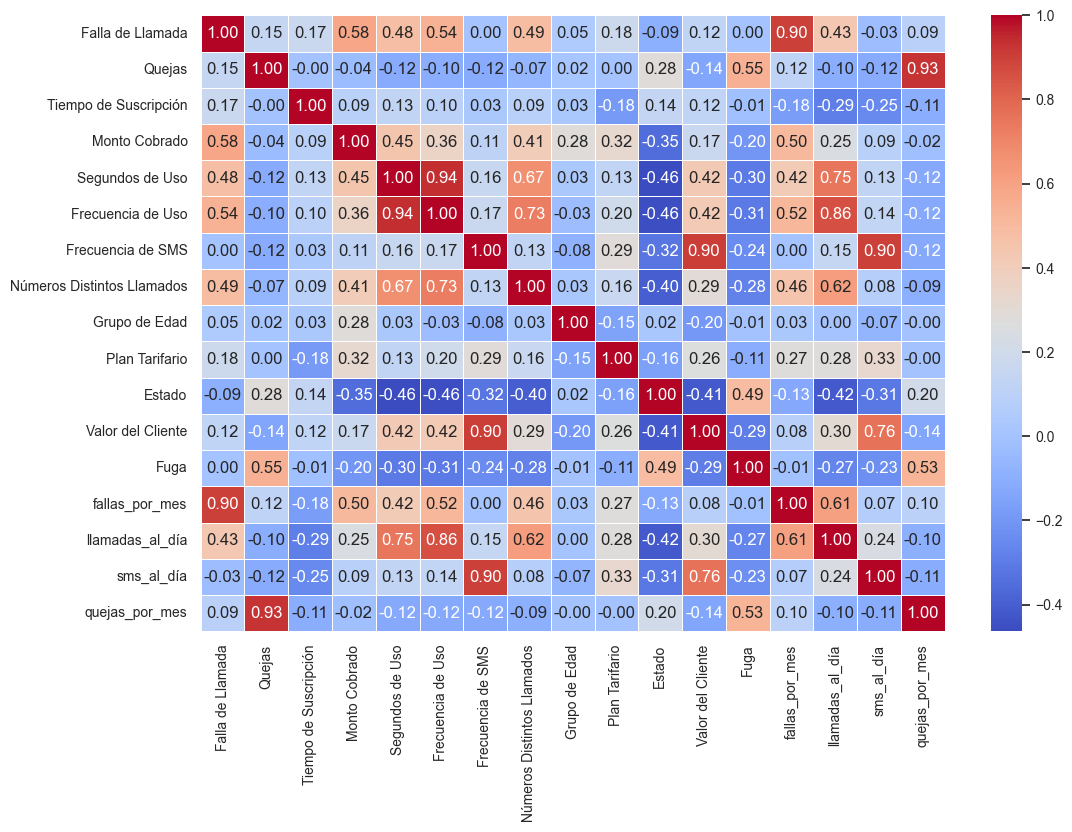

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_prueba.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

In [20]:
X = data_prueba.drop(columns=['Fuga'])
y = data_prueba['Fuga']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicaremos PCA tanta hueva csmr

In [23]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 3

clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(estimator=clf,
              step=1,
              cv=cv,
              scoring='accuracy',
              min_features_to_select=min_features_to_select,
              n_jobs=2)

rfecv.fit(X_train_scaled, y_train)

print(f'El número óptimo de características es: {rfecv.n_features_}')


El número óptimo de características es: 6


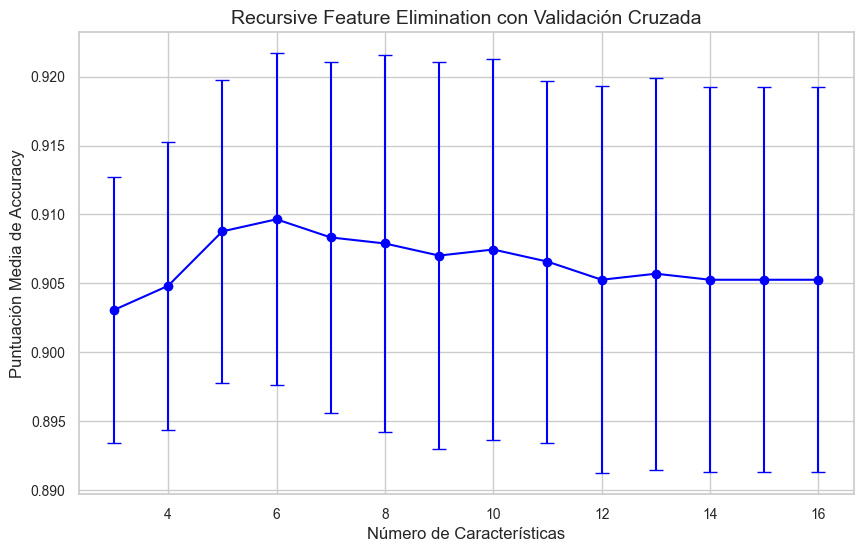

In [24]:
import matplotlib.pyplot as plt
import pandas as pd 

data = {
    key: value 
    for key,value in rfecv.cv_results_.items()
    if key in ['n_features','mean_test_score','std_test_score']
}

cv_results = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
plt.xlabel('Número de Características')
plt.ylabel('Puntuación Media de Accuracy')
plt.errorbar(cv_results['n_features'], 
             cv_results['mean_test_score'], 
             yerr=cv_results['std_test_score'], 
             fmt='-o', 
             capsize=5, 
             color='blue')
plt.title('Recursive Feature Elimination con Validación Cruzada')
plt.show()


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Recorrer los folds
for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]

    # RFE con selección de n_features óptimo o fijo
    selector = RFE(clf, n_features_to_select=rfecv.n_features_)  # usar el número óptimo de RFECV
    selector.fit(X_train, y_train)

    # Obtener los nombres de las variables seleccionadas
    selected_features = X.columns[selector.support_]
    print(f"Features selected in fold {i+1}: {list(selected_features)}")


C:\Users\Jeffersson Pretell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jeffersson Pretell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

Features selected in fold 1: ['Quejas', 'Monto Cobrado', 'Plan Tarifario', 'Estado', 'fallas_por_mes', 'quejas_por_mes']


C:\Users\Jeffersson Pretell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jeffersson Pretell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

Features selected in fold 2: ['Quejas', 'Monto Cobrado', 'Grupo de Edad', 'Plan Tarifario', 'Estado', 'quejas_por_mes']


C:\Users\Jeffersson Pretell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jeffersson Pretell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

Features selected in fold 3: ['Falla de Llamada', 'Quejas', 'Monto Cobrado', 'Plan Tarifario', 'Estado', 'quejas_por_mes']


C:\Users\Jeffersson Pretell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jeffersson Pretell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

Features selected in fold 4: ['Falla de Llamada', 'Quejas', 'Monto Cobrado', 'Plan Tarifario', 'Estado', 'quejas_por_mes']
Features selected in fold 5: ['Quejas', 'Monto Cobrado', 'Plan Tarifario', 'Estado', 'fallas_por_mes', 'quejas_por_mes']


C:\Users\Jeffersson Pretell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jeffersson Pretell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

In [ ]:
Nueva_x = X_train_scaled[:, rfecv.support_]

In [41]:
X_train.columns[rfecv.support_]

Index(['Falla de Llamada', 'Monto Cobrado', 'Segundos de Uso',
       'Frecuencia de Uso', 'sms_al_día', 'quejas_por_mes'],
      dtype='object')

In [45]:
nuevos_features = pd.DataFrame(data_prueba.loc[:,['Falla de Llamada', 'Monto Cobrado', 'Segundos de Uso',
       'Frecuencia de Uso', 'sms_al_día', 'quejas_por_mes','Fuga']])
nuevos_features

,Falla de Llamada,Monto Cobrado,Segundos de Uso,Frecuencia de Uso,sms_al_día,quejas_por_mes,Fuga
0,8.0,0,4370.0,71.0,3.947368,0.000000,0
1,0.0,0,318.0,5.0,5.384615,0.000000,0
2,10.0,0,2453.0,60.0,169.864865,0.000000,0
3,10.0,0,4198.0,66.0,0.789474,0.000000,0
4,3.0,0,2393.0,58.0,1.578947,0.000000,0
...,...,...,...,...,...,...,...
3096,17.0,1,9237.0,177.0,141.176471,0.000000,0
3097,13.0,4,3157.0,51.0,63.333333,0.000000,0
3099,8.0,2,1792.0,25.0,13.548387,0.064516,1
3123,26.0,9,10740.0,99.0,6.315789,0.000000,0


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nuevos_features.drop(columns='Fuga'),
                                                    nuevos_features['Fuga'],stratify=nuevos_features['Fuga'],
                                                    test_size=0.2, random_state=42)

In [53]:
nuevos_features_test = pd.concat([X_test, y_test], axis=1)
nuevos_features_train = pd.concat([X_train, y_train], axis=1)

In [52]:
nuevos_features_test.to_csv('E:/Mi unidad/VSC/proyecto2/data/procesada/data_procesada_test.csv', index=False)

In [54]:
nuevos_features_train.to_csv('E:/Mi unidad/VSC/proyecto2/data/procesada/data_procesada_train.csv', index=False)

In [46]:
nuevos_features.to_csv('E:/Mi unidad/VSC/proyecto2/data/data_procesada.csv', index=False)